# Methodologies  

1. Data Import & Exploration  
2. Identifying Data and Attributes  
3. Determining the Type of Dataset  
4. Data Quality Assessment  
5. Quantitative Statistics  
6. Application of Proximity (Distance Analysis)  
7. Data Mining: Association Rule Mining  


# Data Import & Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import holidays

In [3]:

# Read the CSV file
file_path = 'data/wfp_food_prices_phl.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df

/tmp/ipykernel_159732/2812996776.py:3: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.3717
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.4461
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123090,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Calamansi,KG,aggregate,Retail,PHP,71.67,1.4949
123091,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Eggplants,KG,aggregate,Retail,PHP,103.33,2.1555
123092,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Onions (red),KG,aggregate,Retail,PHP,114.17,2.3814
123093,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Papaya,KG,aggregate,Retail,PHP,45.0,0.9387


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123095 entries, 0 to 123094
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       123095 non-null  object
 1   admin1     123095 non-null  object
 2   admin2     123095 non-null  object
 3   market     123095 non-null  object
 4   latitude   123095 non-null  object
 5   longitude  123095 non-null  object
 6   category   123095 non-null  object
 7   commodity  123095 non-null  object
 8   unit       123095 non-null  object
 9   priceflag  123095 non-null  object
 10  pricetype  123095 non-null  object
 11  currency   123095 non-null  object
 12  price      123095 non-null  object
 13  usdprice   123095 non-null  object
dtypes: object(14)
memory usage: 13.1+ MB


In [5]:
categorical_cols = [
    "date", "admin1", "admin2", "market", 
    "category", "commodity", "unit", "priceflag", 
    "pricetype", "currency"
]

numerical_cols = ["latitude", "longitude", "price", "usdprice"]

In [6]:
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)
    

Value counts for 'date':
date
2020-07-15    2795
2020-10-15    2790
2020-08-15    2782
2020-05-15    2745
2020-11-15    2743
              ... 
2019-06-15      18
2004-02-15      18
2019-12-15      16
2019-11-15      16
#date            1
Name: count, Length: 300, dtype: int64
----------------------------------------
Value counts for 'admin1':
admin1
Region III                              10625
Region VI                                9119
Region V                                 8893
Region VIII                              8525
Cordillera Administrative region         8287
Region XI                                8202
Region X                                 7190
Region IV-B                              7122
Region IV-A                              7084
Region XII                               6996
Region XIII                              6930
Region VII                               6681
Region I                                 6205
Region II                                6151
Reg

In [7]:
print("Descriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Descriptive statistics for numerical columns:
       latitude longitude   price usdprice
count    123095    123095  123095   123095
unique      193       191   24479    54979
top        7.18    125.44    30.0   0.8092
freq       2438      2438     474       32


In [8]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

# Data Dictionary

In [9]:
# Data dictionary descriptions for the columns (Updated variable names)
data_descriptions = {
    "date": "Date when the price was recorded",
    "admin1": "First administrative division (region) where the market is located",
    "admin2": "Second administrative division (city) where the market is located",
    "market": "Name of the specific market where the commodity was recorded",
    "latitude": "Latitude coordinate of the market’s location",
    "longitude": "Longitude coordinate of the market’s location",
    "category": "General category to which the commodity belongs (e.g., 'oil and fats', 'cereals and tubers')",
    "commodity": "Specific item being traded (e.g., rice, wheat, tomatoes)",
    "unit": "Measurement unit of the commodity (e.g., kg, liter, piece)",
    "priceflag": "Flag indicating the reliability or nature of the price data (e.g., actual, aggregate)",
    "pricetype": "Type of price recorded (e.g., wholesale, retail, farmgate)",
    "currency": "Currency in which the price was recorded (e.g., USD, PHP)",
    "price": "Recorded price of the commodity in its local currency",
    "usdprice": "Price of the commodity converted into USD"
}


# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': df.columns,
    'Description': [data_descriptions.get(col, 'No description available') for col in df.columns],
    'Data Type': df.dtypes.values
})

# Display the data dictionary
data_dictionary


,Column Name,Description,Data Type
0,date,Date when the price was recorded,object
1,admin1,First administrative division (region) where t...,object
2,admin2,Second administrative division (city) where th...,object
3,market,Name of the specific market where the commodit...,object
4,latitude,Latitude coordinate of the market’s location,object
5,longitude,Longitude coordinate of the market’s location,object
6,category,General category to which the commodity belong...,object
7,commodity,"Specific item being traded (e.g., rice, wheat,...",object
8,unit,"Measurement unit of the commodity (e.g., kg, l...",object
9,priceflag,Flag indicating the reliability or nature of t...,object


# Identifying Data and Attributes

In [10]:
# --- Convert Data Types ---
# Convert 'date' to datetime (invalid formats become NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert latitude and longitude to numeric (float)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert price and usdprice to numeric (float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# --- Validate Reasonable Values ---
# Define valid conditions for each column:
valid_date = df['date'].notna()  # Date is valid if not NaT

# Latitude: valid if not NaN and between -90 and 90
valid_lat = df['latitude'].notna() & (df['latitude'] >= -90) & (df['latitude'] <= 90)

# Longitude: valid if not NaN and between -180 and 180
valid_lon = df['longitude'].notna() & (df['longitude'] >= -180) & (df['longitude'] <= 180)

# Price: valid if not NaN and non-negative
valid_price = df['price'].notna() & (df['price'] >= 0)

# usdprice: valid if not NaN and non-negative
valid_usdprice = df['usdprice'].notna() & (df['usdprice'] >= 0)

# Combine all conditions: only rows meeting all criteria are valid
all_valid = valid_date & valid_lat & valid_lon & valid_price & valid_usdprice

# --- Create a New DataFrame with Only Valid Rows ---
df_cleaned = df[all_valid].copy()

print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_cleaned))

/tmp/ipykernel_159732/2049820636.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


Number of rows before cleaning: 123095
Number of rows after cleaning: 123094


In [11]:
df_cleaned = df[df['date'].notna()].copy()

In [12]:
# Extract month from the date
df_cleaned['month'] = df_cleaned['date'].dt.month

# Convert month to cyclic features
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)


In [13]:
df_cleaned['day_of_week'] = df_cleaned['date'].dt.day_name()

In [14]:
ph_holidays = holidays.PH() # Pwedeng hindi updated yung holidays dito so pwede 
                            # tayo gumamit ng ibang way para iset yung holidays

In [15]:
# Ensure the date column is in datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Create the holiday indicator
df_cleaned['is_holiday'] = df_cleaned['date'].apply(lambda x: x in ph_holidays)


In [16]:
df_cleaned['day_before_holiday'] = df_cleaned['date'].apply(lambda x: (x - pd.Timedelta(days=1)) in ph_holidays)
df_cleaned['day_after_holiday'] = df_cleaned['date'].apply(lambda x: (x + pd.Timedelta(days=1)) in ph_holidays)


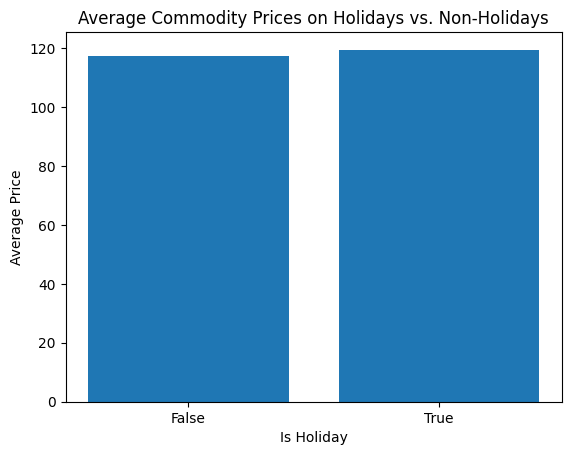

In [17]:
holiday_prices = df_cleaned.groupby('is_holiday')['price'].mean().reset_index()
plt.bar(holiday_prices['is_holiday'].astype(str), holiday_prices['price'])
plt.xlabel('Is Holiday')
plt.ylabel('Average Price')
plt.title('Average Commodity Prices on Holidays vs. Non-Holidays')
plt.show()


In [18]:
central_lat = 14.5995   # Example: Latitude for Manila, Philippines
central_lon = 120.9842  # Example: Longitude for Manila, Philippines

# Define the Haversine function to compute distance in kilometers
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Earth's radius in kilometers (6371 km)
    km = 6371 * c
    return km

df_cleaned['distance_from_central'] = haversine_distance(central_lat, central_lon, df_cleaned['latitude'], df_cleaned['longitude'])

print(df_cleaned[['market', 'latitude', 'longitude', 'distance_from_central']].tail())

             market  latitude   longitude  distance_from_central
123090  Butuan City  8.957268  125.534029             799.170559
123091  Butuan City  8.957268  125.534029             799.170559
123092  Butuan City  8.957268  125.534029             799.170559
123093  Butuan City  8.957268  125.534029             799.170559
123094  Butuan City  8.957268  125.534029             799.170559


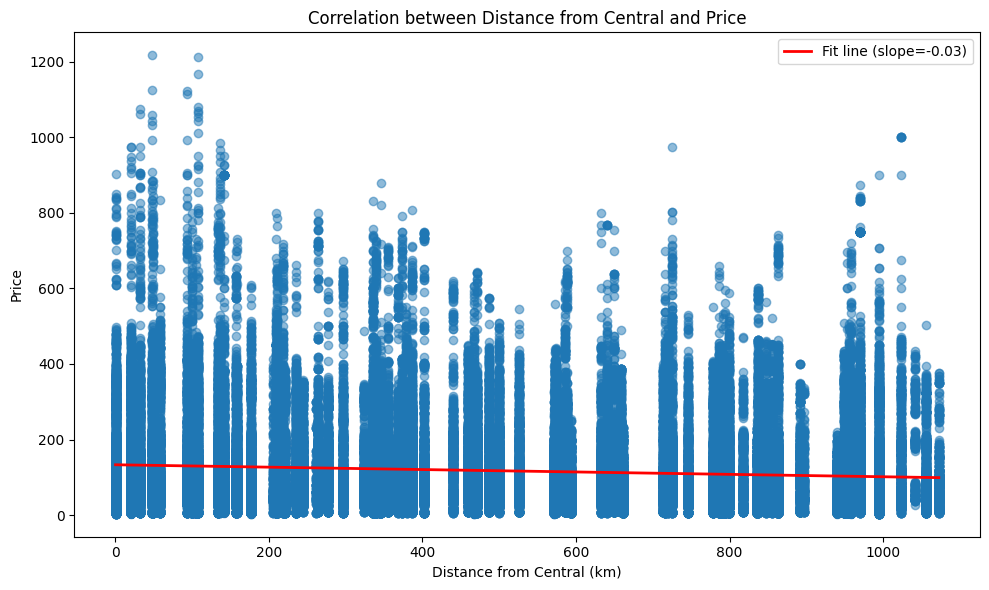

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['distance_from_central'], df_cleaned['price'], alpha=0.5)
plt.xlabel('Distance from Central (km)')
plt.ylabel('Price')
plt.title('Correlation between Distance from Central and Price')

slope, intercept = np.polyfit(df_cleaned['distance_from_central'], df_cleaned['price'], 1)
x_vals = np.array([df_cleaned['distance_from_central'].min(), df_cleaned['distance_from_central'].max()])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Fit line (slope={slope:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.sort_values(['market', 'commodity', 'date'], inplace=True)

# Create a new feature: price lag of 1 month for the same commodity (within the same market)
df_cleaned['price_lag_1m'] = df_cleaned.groupby(['market', 'commodity'])['price'].shift(1)

# Used backfill for now pero pwede rin itry na median or mean yung gamit
df_cleaned['price_lag_1m'] = df_cleaned.groupby(['market', 'commodity'])['price_lag_1m'].transform(lambda x: x.fillna(method='bfill'))

print(df_cleaned[['date', 'market', 'commodity', 'price', 'price_lag_1m']].head(10))

/tmp/ipykernel_159732/437310029.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['price_lag_1m'] = df_cleaned.groupby(['market', 'commodity'])['price_lag_1m'].transform(lambda x: x.fillna(method='bfill'))


            date market          commodity   price  price_lag_1m
23511 2020-05-15   Abra  Bananas (lakatan)  104.31        104.31
25866 2020-06-15   Abra  Bananas (lakatan)  103.08        104.31
28241 2020-07-15   Abra  Bananas (lakatan)   94.36        103.08
33091 2020-09-15   Abra  Bananas (lakatan)   92.85         94.36
44237 2021-02-15   Abra  Bananas (lakatan)   92.50         92.85
50782 2021-06-15   Abra  Bananas (lakatan)   91.25         92.50
52413 2021-07-15   Abra  Bananas (lakatan)   78.75         91.25
54038 2021-08-15   Abra  Bananas (lakatan)   76.25         78.75
55685 2021-09-15   Abra  Bananas (lakatan)   82.50         76.25
57293 2021-10-15   Abra  Bananas (lakatan)   87.50         82.50
